# Recognizing Handwritten Images with MNIST Dataset

👨‍💻 **Arjun Adhikari**, June 15, 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Step 1 : Data Preparation

In [2]:
df = pd.read_csv('csv/train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


First column represent the label and rest of the column represent the pixels.
Hence, 784 columns will represent the flattened numpy array of ```28*28``` picture.

In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:]
Y = data[:,0]

print(X.shape, Y.shape)

(42000, 784) (42000,)


X is for training/testing data and Y is for label.

In [7]:
split = int(0.8 * X.shape[0])
print(split)

33600


We are splitting 80% of the data for training purpose and rest 20% for the testing purpose.

In [8]:
X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split]
Y_test = Y[split:]

In [9]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, sep='\n')

(33600, 784)
(33600,)
(8400, 784)
(8400,)


##### Visulization of Images

In [10]:
def drawImg(sample):
    
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')

Label : 4


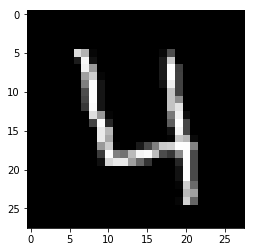

In [11]:
drawImg(X_train[3])
print('Label :', Y_train[3])

#### Step 2 : Implementing KNN

> Can we apply KNN to the data ?  
     - Definitely, YES.

In [12]:
def dist(X, Y):
    
    return np.sqrt(np.sum((X-Y)**2))

In [13]:
def knn(X, Y, queryPoint, k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        
        d = dist(queryPoint, X[i]) # Calculate distance of features
        vals.append((d, Y[i])) # Append distance with class
    
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

#### Step 3 : Make Predictions

In [14]:
pred = knn(X_train, Y_train, X_test[0])
print(int(pred))

0


0


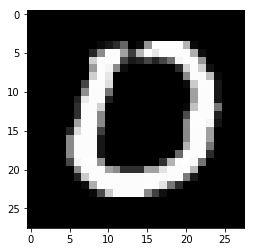

In [15]:
drawImg(X_test[0])
print(Y_test[0])

In [16]:
pred = knn(X_train, Y_train, X_test[1])
print(int(pred))

7


7


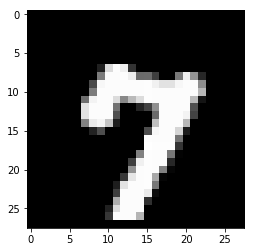

In [17]:
drawImg(X_test[1])
print(Y_test[1])